<a href="https://colab.research.google.com/github/ritwikraha/GenerativeFill-with-Keras-and-Diffusers/blob/main/experiments/image-caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq --upgrade keras-cv tensorflow
!pip install -qq --upgrade keras
!pip install -qq --upgrade transformers torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.6 MB/s eta 0:

In [2]:
import os; os.environ["KERAS_BACKEND"]="tensorflow"
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras import ops
import keras_cv
from PIL import Image
from transformers import (
    BlipProcessor,
    BlipForConditionalGeneration,
)
import torch

In [3]:
!wget -q https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg

In [4]:
def inference_resizing(image, pad=True):
    image = ops.cast(image, dtype="float32")
    image = ops.image.resize(ops.expand_dims(image, 0), (1024, 1024))[0]
    return image

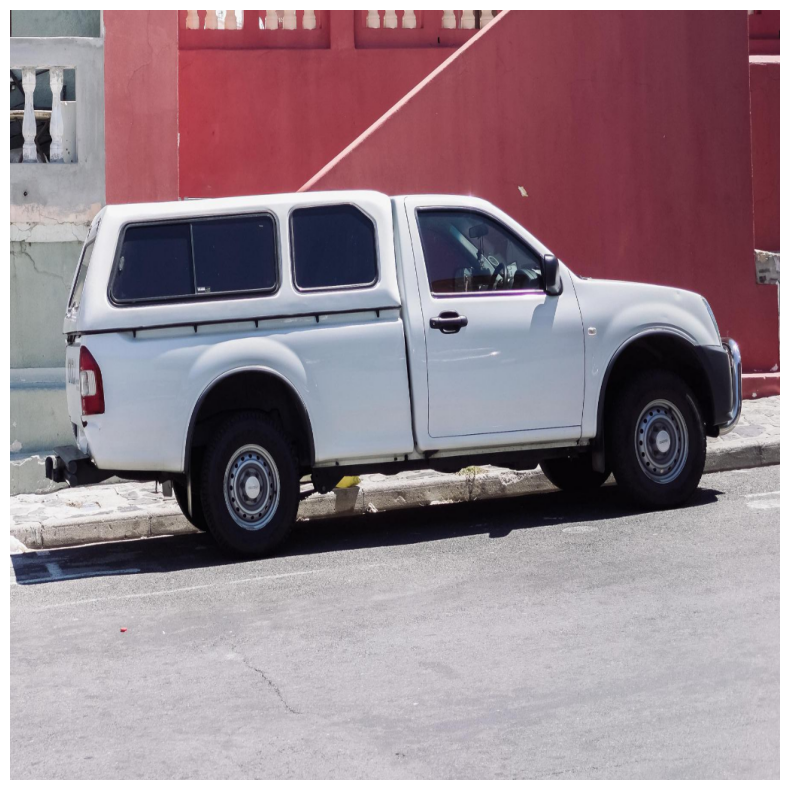

In [5]:
image = keras.utils.load_img("truck.jpg")
image = ops.convert_to_numpy(inference_resizing(image, True))
plt.figure(figsize=(10, 10))
plt.imshow(image.astype(np.uint8))
plt.axis("off")
plt.show()

In [7]:
# Instantiate the model
caption_model_id = "Salesforce/blip-image-captioning-base"
image_model = BlipForConditionalGeneration.from_pretrained(caption_model_id)
processor = BlipProcessor.from_pretrained(caption_model_id)

# Processing the image
inputs = processor(image.astype("uint8"), return_tensors="pt")
out = image_model.generate(**inputs, max_new_tokens=200)

# Generate caption
caption = processor.decode(out[0], skip_special_tokens=True)

print(caption)

a white truck parked on the side of the road
